## [예제] 미국 대통령 당선 정보에서 정당 정보를 도출하여 시각하 하기


### * 불러온 데이타집합의 정보 확인하기

- type(df)  : 데이타 타입
- df.shape  : 행과 열의 수
- df.columns : 컬럼명 확인
- df.dtypes : 각각의 컬럼 데이타타입
- df.info() : df.dtypes 비슷
- df.info
- df.head()
- df.tail()


### 파이썬과 판다스 자료형 비교
    int         int64
    float       float64
    string      object(****)

###  당선된 각 정당(Political Party) 수를 먼저 구해야 한다

- value_counts() 이용

### [연습] 데이타셋에서 다른 인사이트를 도출하여 시각화하기



## 주제


- 출신지역별 당선 횟수
- 당 별 당선횟수 vs 총 집권 연도 상관관계
- electoral vs popular 상관관계
- 정당별 당선 평균 나이

In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('http://qrc.depaul.edu/excel_files/presidents.xlsx')
df

,President,Years in office,Year first inaugurated,Age at inauguration,State elected from,# of electoral votes,# of popular votes,National total votes,Total electoral votes,Rating points,Political Party,Occupation,College,% electoral,% popular
0,George Washington,8.0,1789,57,Virginia,69,NA(),NA(),69,842.0,None,Planter,None,100.000000,NA()
1,John Adams,4.0,1797,61,Massachusetts,132,NA(),NA(),139,598.0,Federalist,Lawyer,Harvard,94.964029,NA()
2,Thomas Jefferson,8.0,1801,57,Virginia,73,NA(),NA(),137,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,NA()
3,James Madison,8.0,1809,57,Virginia,122,NA(),NA(),176,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,NA()
4,James Monroe,8.0,1817,58,Virginia,183,NA(),NA(),221,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,NA()
5,John Quincy Adams,4.0,1825,57,Massachusetts,84,NA(),NA(),261,564.0,Democratic-Republican,Lawyer,Harvard,32.183908,NA()
6,Andrew Jackson,8.0,1829,61,Tennessee,178,642553,1148018,261,632.0,Democrat,Lawyer,None,68.199234,55.9706
7,Martin Van Buren,4.0,1837,54,New York,170,764176,1503534,294,429.0,Democrat,Lawyer,None,57.823129,50.8253
8,William Henry Harrison,0.8,1841,68,Ohio,234,1275390,2411808,294,329.0,Whig,Soldier,Hampden-Sydney,79.591837,52.8811
9,James K. Polk,4.0,1845,49,Tennessee,170,1339494,2703659,275,632.0,Democrat,Lawyer,U. of North Carolina,61.818182,49.5437


New York         6
Ohio             6
Virginia         4
Illinois         3
Massachusetts    3
California       2
Tennessee        2
Texas            2
New Jersey       1
Arkansas         1
Indiana          1
Georgia          1
New Hampshire    1
Louisiana        1
Pennsylvania     1
Name: State elected from, dtype: int64
**************************************************


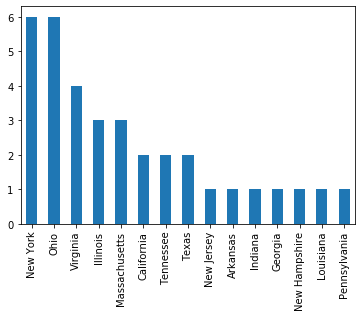

In [16]:
#출신 지역별 당선횟수
cnt_state = df['State elected from'].value_counts()
print(cnt_state)
print("*"*50)


%matplotlib inline
cnt_state.plot(kind = 'bar')



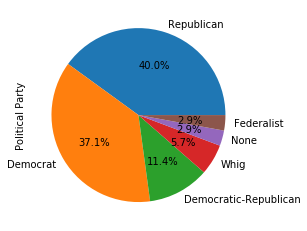

In [97]:
# 정당별 당선횟수
cnt_party = df['Political Party'].value_counts()
cnt_party.plot(kind = 'pie',autopct='%1.1f%%')

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text xticklabel objects>)

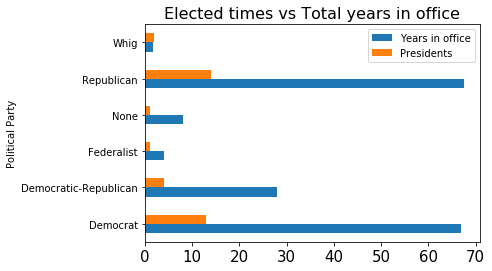

In [93]:
# 당 별 당선횟수 vs 총 집권 연도 상관관계

import pandas as pd
import matplotlib.pyplot as plt

dataset = df.groupby("Political Party")

count = dataset["President"].count()
years = dataset["Years in office"].sum()
idx = years.index


result = pd.DataFrame({"Political Party":idx, "Years in office":years.values, "Presidents": count.values})


%matplotlib inline
graph = result.plot(x="Political Party", y=["Years in office","Presidents"], kind="barh")

plt.title("Elected times vs Total years in office",fontsize= 16)
plt.xticks(fontsize=15)

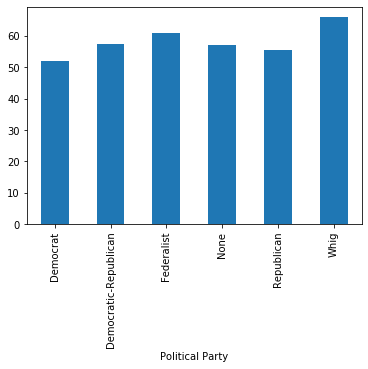

In [98]:
# 정당별 평균 당선 나이


age = df.groupby(by=['Political Party']).mean()['Age at inauguration']
age.plot(kind = 'bar')

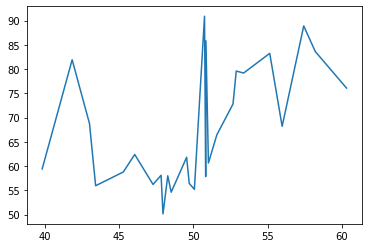

In [96]:
import numpy as np
from matplotlib import pyplot as plt

#Null값 처리
df_Na =df.replace('NA()',np.nan).dropna(axis=0).sort_values('% popular')

elec = df_Na['% electoral']
pop = df_Na['% popular']

plt.plot(pop,elec)
plt.show()


# poplular가 높다고 해소 electoral 이 높은 것은 아님

In [3]:
# [참고] 웹에서 제공하는 데이타를 다운로드하기 
'''
import urllib.request as req

local = './data/president/presidents.xlsx'  # data폴더 밑에 president 폴더가 있어야 한다
url = 'http://qrc.depaul.edu/excel_files/presidents.xlsx'
req.urlretrieve(url,local)
print('다운로드 완료')
'''

"\nimport urllib.request as req\n\nlocal = './data/president/presidents.xlsx'  # data폴더 밑에 president 폴더가 있어야 한다\nurl = 'http://qrc.depaul.edu/excel_files/presidents.xlsx'\nreq.urlretrieve(url,local)\nprint('다운로드 완료')\n"

In [4]:
###  데이타 정보 확인하기
'''
- print(type(df))  # 데이타 타입
- print(df.shape) # 행과 열의 수
- print(df.columns) # 컬럼명 확인
- print(df.dtypes) # 각각의 컬럼 데이타타입
- print(df.info()) # df.dtypes 비슷
- print(df.info) # 전체적인 내용을???
- print(df.head())
- print(df.tail())
'''

'\n- print(type(df))  # 데이타 타입\n- print(df.shape) # 행과 열의 수\n- print(df.columns) # 컬럼명 확인\n- print(df.dtypes) # 각각의 컬럼 데이타타입\n- print(df.info()) # df.dtypes 비슷\n- print(df.info) # 전체적인 내용을???\n- print(df.head())\n- print(df.tail())\n'

### * 인사이트를 도출하여 정보를 추출하고 시각화